# Big Bio Data Analysis: Assignement One

## Assignment Due: 13-Nov-2021

## Please Read The Instructions Below:

- This assignment is to be done individually.
- Please state your name clearly at the top of your notebook in markdown.
- Please state your registration number clearly at the top of your notebook in markdown.
- No cheating/duplicating of work will be tolerated.
- Please leave comments to capture the ideas you are trying to implement, failure to do so will lead to loss of marks.
- This assignment is marked out of 20 and contributes to your final result in this course.

## Dataset:
- For this assignment we shall use the **Heart Disease** dataset which can be found in the Data Folder.
- Please use the appropriate data for this assignment.

# Assignment Instruction:

Using the provided dataset, you are going to accomplish the task of taking it through the steps of machine learning as discussed in class. The steps to be looked at are stated below.

    - Data Cleansing: Clean your data appropriately
    - Data Preprocessing: Make the necessary transformations that you think are useful
    - EDA (Exploratory Data Analysis): Plot visuals to explain your investigations (all visuals should be done in seaborn library)
    - Creating Training/Validation Datasets: split your data into test and train: test data should be 25% of the total data.
    - Algorithm Selection: sample at least 8 algorithms of your own choice in this assignment and make appropriate comparisons.
    - Model Training: Train a base model from your final choice of algorithm
    - Model Testing: Test the model on your test data.
    - Communicate your findings.

### Please leave  your details below and change the name of this file to your own name: ie instead of Assignment One.ipyn it can be: 
```
Assignment One <Nakabiri Florence>.ipynb

```
## Name of Student: NAKABIRI FLORENCE
## Registration Number: 2020/HD07/20692U

#importing data, required modules and data cleaning.

In [2]:

#import pandas as pd
import sklearn


In [74]:
from pandas import read_csv
path = "~/Desktop/heart.csv"
hdata = read_csv(path)
names = ['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR','ExerciseAngina','Oldpeak','ST_Slope','HeartDisease']
print(hdata.shape)
print(hdata[:920])
#using pandas directly to read.
hdata = pd.read_csv('~/Desktop/heart.csv')

(918, 12)
     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
5     39   M           NAP        120          339          0     Normal   
6     45   F           ATA        130          237          0     Normal   
7     54   M           ATA        110          208          0     Normal   
8     37   M           ASY        140          207          0     Normal   
9     48   F           ATA        120          284          0     Normal   
10    37   F           NAP        130          211          0     Normal   
11    58   M           ATA        136          164          0         ST   
12

In [65]:
pd.set_option('max_columns',50)
pd.set_option('max_rows',920)

pd.set_option('max_colwidth',100)
print (hdata)

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
5     39   M           NAP        120          339          0     Normal   
6     45   F           ATA        130          237          0     Normal   
7     54   M           ATA        110          208          0     Normal   
8     37   M           ASY        140          207          0     Normal   
9     48   F           ATA        120          284          0     Normal   
10    37   F           NAP        130          211          0     Normal   
11    58   M           ATA        136          164          0         ST   
12    39   M

#Getting information about the data.

In [5]:
hdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


The data has 12 columns and 918 rows

Determining the Data types

In [ ]:
hdata.dtypes

#Dataset description:
#Numerical and categorical variables description.

In [53]:
categorical_var = hdata.select_dtypes('object').columns
print(f'categorical columns: {hdata[categorical_var].columns}')

categorical columns: Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')


In [54]:
hdata[categorical_var].describe()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


The categorical variables as as decribed in the table above with respect to the unique, top and frequency of each respectively.

In [50]:
Numerical_var=hdata.drop(['HeartDisease'],axis=1).select_dtypes('number').columns
print(f'Numerical columns:  {hdata[Numerical_var].columns}')
print('\n')

Numerical columns:  Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak'], dtype='object')




In [51]:
hdata[Numerical_var].describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000


The numerical variable objects are as per the above table with respect to each object's standard deviation,mean and percentiles.

### summarize the number of unique values for each column using numpy

In [80]:
hdata = pd.read_csv('~/Desktop/heart.csv')
print(hdata.nunique())

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64


###Dropping the FastingBS column as it only contains 0 values and outliers

In [45]:
Newhdata = hdata.drop(['FastingBS'],axis=1)
Newhdata

,Age,Sex,ChestPainType,RestingBP,Cholesterol,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,LVH,174,N,0.0,Flat,1


##Checking the data for any duplicates

In [6]:
hdata.duplicated().sum()

0

There are no observed duplicates in the dataset

In [61]:
heart_df = pd.read_csv('~/Desktop/heart.csv')
print(heart_df.nunique())

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64


# Checking the data for any outliers

In [32]:
from matplotlib import pyplot
import seaborn as sns
from pandas import read_csv

checking outliers for RestingBP

<AxesSubplot:xlabel='RestingBP'>

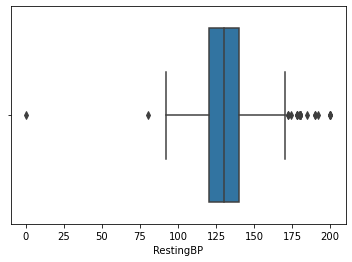

In [34]:
sns.boxplot(x=hdata['RestingBP'])

Checking outliers for Cholesterol

<AxesSubplot:xlabel='Cholesterol'>

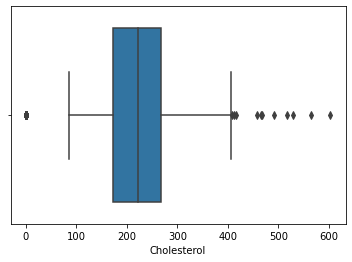

In [38]:
import seaborn as sns
sns.boxplot(x=hdata['Cholesterol'])

Checking outliers for Oldpeak

<AxesSubplot:xlabel='Oldpeak'>

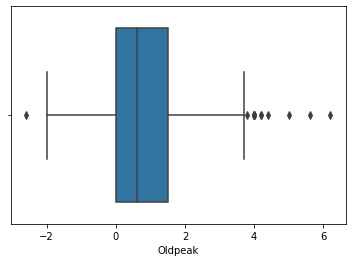

In [39]:
sns.boxplot(x=hdata['Oldpeak'])

Checking outliers for MaxHR

<AxesSubplot:xlabel='MaxHR'>

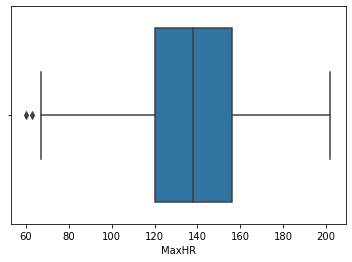

In [40]:
sns.boxplot(x=hdata['MaxHR'])

Checking outliers for FastingBS

<AxesSubplot:xlabel='FastingBS'>

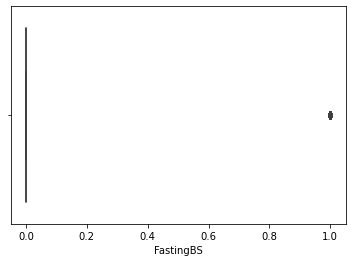

In [41]:
sns.boxplot(x=hdata['FastingBS'])

Checking outliers for Age

<AxesSubplot:xlabel='Age'>

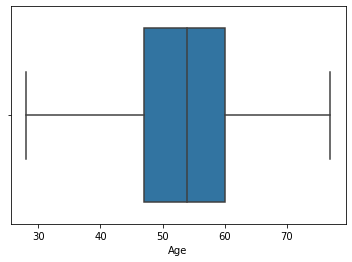

In [55]:
sns.boxplot(x=hdata['Age'])

Data Preprocessing

In [20]:
from sklearn import preprocessing
import pandas as pd

checking for null values

In [81]:
hdata.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Finding the mean,standard deviation,minimum, maximum and percentiles of the data

In [83]:
hdata.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


#Finding the median of the data

In [84]:
hdata.median()

/var/folders/wn/1dszyjkj6vv8b2w27t8bd4yw0000gn/T/ipykernel_67525/3599367848.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  hdata.median()


Age              54.0
RestingBP       130.0
Cholesterol     223.0
FastingBS         0.0
MaxHR           138.0
Oldpeak           0.6
HeartDisease      1.0
dtype: float64

In [58]:
from pandas import read_csv
from numpy import set_printoptions
from sklearn import preprocessing
path = "~/Desktop/heart.csv"
hdata = read_csv(path)
names = ['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR','ExerciseAngina','Oldpeak','ST_Slope','HeartDisease']
print(hdata.shape)
print(hdata[:920])
#using pandas directly to read.
hdata = pd.read_csv('~/Desktop/heart.csv')
hdata = read_csv(path, names=names)
array = hdata.values

(918, 12)
     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172       

###Exploratory Data Analysis

In [ ]:
import pandas as pd
import matplotlib as plt

Importing the heart.csv data

In [21]:
hdata = pd.read_csv('~/Desktop/heart.csv')
hdata.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Looking at the last 10 lines of the dataset

In [23]:
hdata.tail(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
908,63,M,ASY,140,187,0,LVH,144,Y,4.0,Up,1
909,63,F,ASY,124,197,0,Normal,136,Y,0.0,Flat,1
910,41,M,ATA,120,157,0,Normal,182,N,0.0,Up,0
911,59,M,ASY,164,176,1,LVH,90,N,1.0,Flat,1
912,57,F,ASY,140,241,0,Normal,123,Y,0.2,Flat,1
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


Looking at the shape of the dataset

In [26]:
hdata.shape

(918, 12)

Describing the data

In [29]:
hdata.info

<bound method DataFrame.info of      Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisea

plotting the numerical values

Numerical columns:  Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak'], dtype='object')




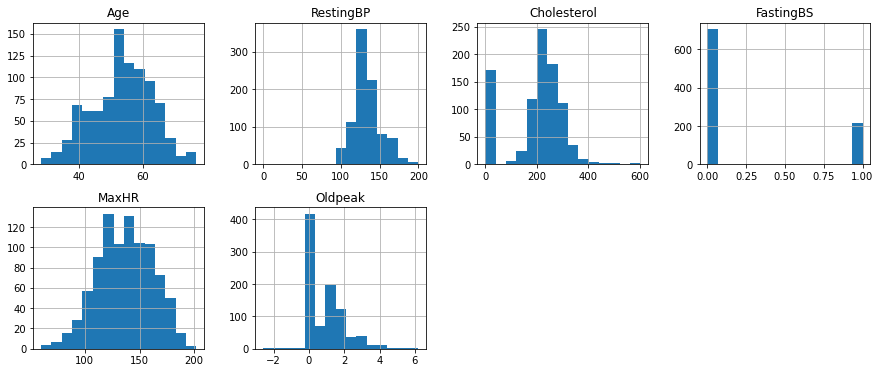

In [36]:
Numerical_var=hdata.drop(['HeartDisease'],axis=1).select_dtypes('number').columns
print(f'Numerical columns:  {hdata[Numerical_var].columns}')
print('\n')
hdata[Numerical_var].hist(bins=15, figsize=(15, 6), layout=(2, 4));

Correlation plots between numerical variables

#Age and Cholesterol scatterplot

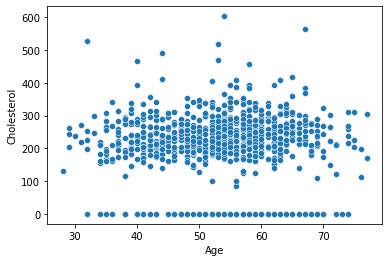

In [41]:
import seaborn as sns
sns.scatterplot(x=hdata['Age'], y=hdata['Cholesterol']);

From the scatter plot, theres no correlation between Age and Cholesterol.

Age and Heartdisease

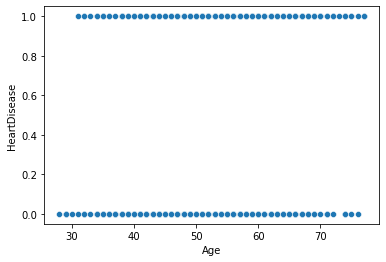

In [42]:
sns.scatterplot(x=hdata['Age'], y=hdata['HeartDisease']);

Theres no correlation between age and Heart Disease

Age and RestingBP

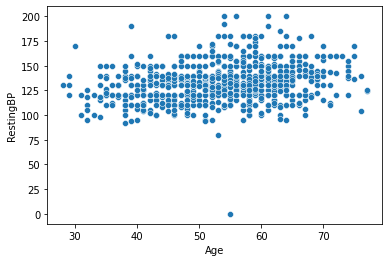

In [43]:
sns.scatterplot(x=hdata['Age'], y=hdata['RestingBP']);

There's correlation between age and RestingBP

Oldpeak and HeartDisease

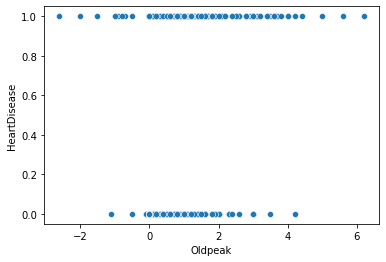

In [45]:
sns.scatterplot(x=hdata['Oldpeak'], y=hdata['HeartDisease']);

There's no correlation between Oldpeak and HeartDisease.

Cholesterol and HeartDisease

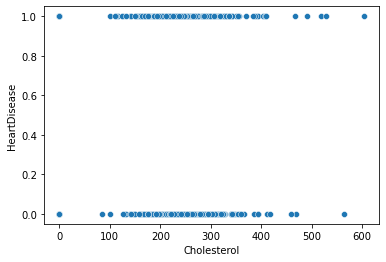

In [48]:
sns.scatterplot(x=hdata['Cholesterol'], y=hdata['HeartDisease']);

There's no correlation between Cholesterol and HeartDisease

MaxHR and HeartDisease

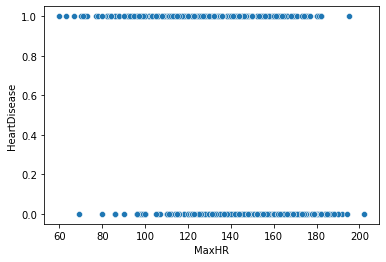

In [49]:
sns.scatterplot(x=hdata['MaxHR'], y=hdata['HeartDisease']);

There's no correlation between MaxHR and HeartDisease.

RestingBP and HeartDisease

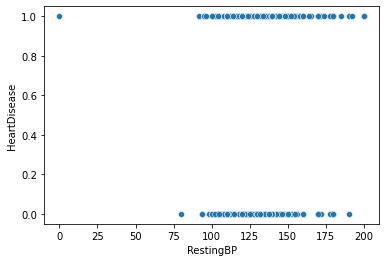

In [50]:
sns.scatterplot(x=hdata['RestingBP'], y=hdata['HeartDisease']);

There's no correlation between RestingBP and HeartDisease.

MaxHR and HeartDisease

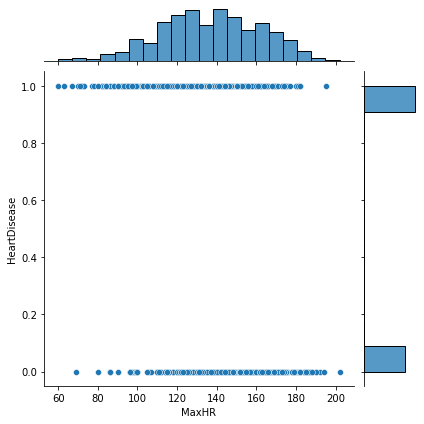

In [51]:
sns.jointplot(x=hdata['MaxHR'], y=hdata['HeartDisease']);

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


Visualisation of categorical variables

In [53]:
categorical_var = hdata.select_dtypes('object').columns
print(f'categorical columns: {hdata[categorical_var].columns}')

categorical columns: Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')


/Users/florencenakabiri/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/florencenakabiri/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/florencenakabiri/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinte

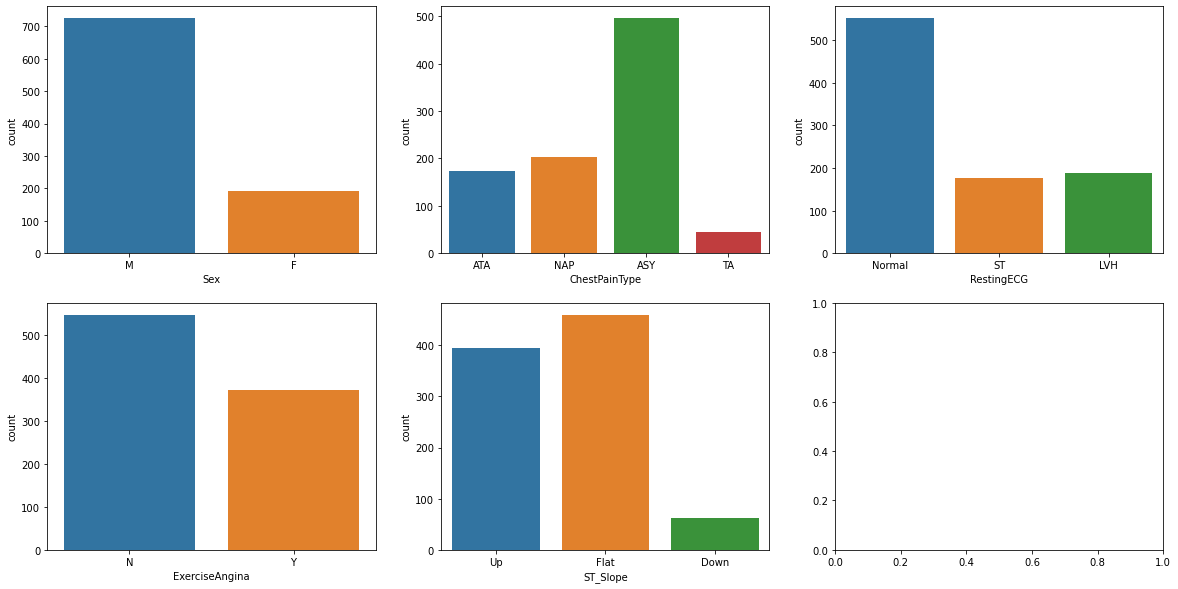

In [54]:

fig, ax = plt.subplots(2, 3, figsize=(20, 10)) #create a figure with 2 rows and 3 columns
for variable, subplot in zip(categorical_var, ax.flatten()):#iterate over categorical variables
    sns.countplot(hdata[variable], ax=subplot)


Interpritation:
Sex: Males were more than females.
Chestpaintype: Majority of the people presented with AYS type of pain as compared to NAP and ATA, with the TA being the least.
RestingECG: Majority had a normal ECG as compared to those that presented with ST and LYH.
ExerciseAngina: Fewer presented with ExcerciseAngina related pain than those with pain.
ST_Slope: The Flat were higher than those with Up and down.

The relationship between numerical and categorical variables.

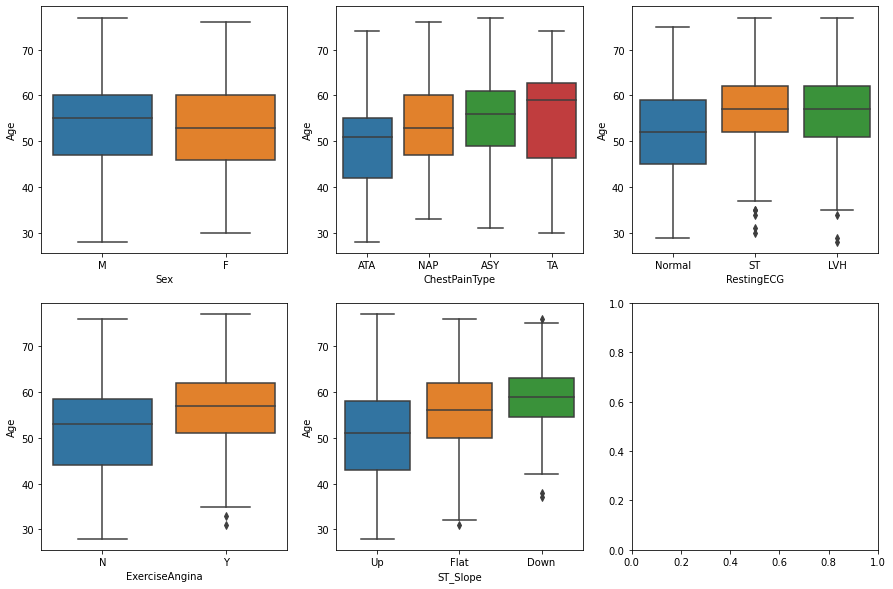

In [56]:
ig, ax = plt.subplots(2, 3, figsize=(15, 10))
for var, subplot in zip(categorical_var, ax.flatten()):
    sns.boxplot(x=var, y='Age', data=hdata, ax=subplot)

#Creating training/Validation dataset

In [27]:
hdata.describe

<bound method NDFrame.describe of      Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDis

Looking for null values

In [28]:
Null_values = hdata.isnull().sum()
Null_values

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

#Installing sklearn

In [8]:
!pip3 install sklearn

  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 8.0 MB 593 kB/s            
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1317 sha256=f08843b77b2dfdb705eba9f9d6f269283f70af676d777c46121658a17946b5fd
  Stored in directory: /Users/florencenakabiri/Library/Caches/pip/wheels/e4/7b/98/b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built sklearn


#Importing sklear, pandas and their necessary packages

In [9]:
from sklearn import preprocessing
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

Reading in data with pandas

In [59]:
hdata = pd.read_csv('~/Desktop/heart.csv')
hdata.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


spliting the data into the train and test sets

In [11]:
hdata = pd.read_csv('~/Desktop/heart.csv')
train, test = train_test_split(hdata)

#Creating a dataset

In [14]:
X,y = make_blobs(n_samples=920)

Spliting the data into the test and train sets.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(688, 2) (230, 2) (688,) (230,)


In [15]:
# demonstrate that the train-test split procedure is repeatable
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
# create dataset
X, y = make_blobs(n_samples=918)
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=1)
# summarize first 5 rows
print(X_train[:5, :])
# split again, and we should see the same split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=1)
# summarize first 5 rows
print(X_train[:5, :])

[[-6.99696813 -7.40673151]
 [ 7.86148514 -9.15890595]
 [ 6.91397692 -9.94805712]
 [ 8.31625513 -8.96935965]
 [-8.16596448 -7.17840963]]
[[-6.99696813 -7.40673151]
 [ 7.86148514 -9.15890595]
 [ 6.91397692 -9.94805712]
 [ 8.31625513 -8.96935965]
 [-8.16596448 -7.17840963]]


Evaluation of data using dataforest.

Model training

In [86]:
# train-test split evaluation random forest
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# load dataset
hdata = pd.read_csv('~/Desktop/heart.csv')
hdata.head(5)
data = hdata.values
# split into inputs and outputs
X, y = data[:, :-1], data[:, -1]
print(X.shape, y.shape)
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# fit the model
model = RandomForestClassifier(random_state=1)
model.fit(X_train, y_train)
# make predictions
yhat = model.predict(X_test)
# evaluate predictions
acc = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % acc)

(918, 11) (918,)
(615, 11) (303, 11) (615,) (303,)


ValueError: could not convert string to float: 'M'

#Model Testing

In [84]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

np.random.seed(42)

# Generating and ploting data

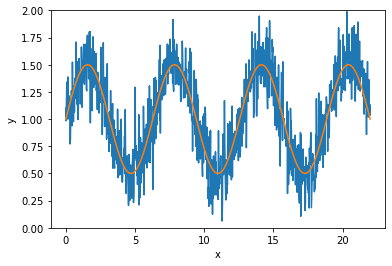

In [77]:
N = 918
x = np.linspace(0, 7*np.pi, N)
smooth = 1 + 0.5*np.sin(x)
y = smooth + 0.2*np.random.randn(N)
plt.plot(x, y)
plt.plot(x, smooth)
plt.xlabel("x")
plt.ylabel("y")
plt.ylim(0,2)
plt.show()


# Train-test split, intentionally using shuffle=False

In [81]:
X = x.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=False)

# Creating two models: Polynomial and linear regression

In [80]:
degree = 2
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression(fit_intercept=False))
linreg = LinearRegression()


# Cross-validation of the two

In [79]:
scoring = "neg_root_mean_squared_error"
polyscores = cross_validate(polyreg, X_train, y_train, scoring=scoring, return_estimator=True)
linscores = cross_validate(linreg, X_train, y_train, scoring=scoring, return_estimator=True)


# Which one is better? Linear and polynomial

In [78]:
print("Linear regression score:", linscores["test_score"].mean())
print("Polynomial regression score:", polyscores["test_score"].mean())
print("Difference:", linscores["test_score"].mean() - polyscores["test_score"].mean())

print("Coefficients of polynomial regression and linear regression:")
# Let's show the coefficient of the last fitted polynomial regression
# This starts from the constant term and in ascending order of powers
print(polyscores["estimator"][0].steps[1][1].coef_)
# And show the coefficient of the last-fitted linear regression
print(linscores["estimator"][0].intercept_, linscores["estimator"][-1].coef_)


Linear regression score: -0.4522984756154432
Polynomial regression score: -0.6135383515017236
Difference: 0.16123987588628047
Coefficients of polynomial regression and linear regression:
[ 0.04  0.2  -0.01]
0.9023951081235276 [-0.01]


# Plotting  and comparison

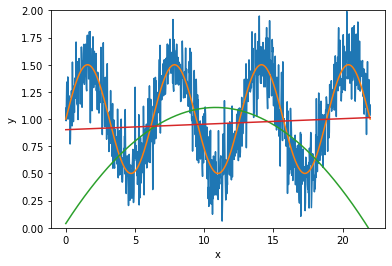

In [82]:
plt.plot(x, y)
plt.plot(x, smooth)
plt.plot(x, polyscores["estimator"][0].predict(X))
plt.plot(x, linscores["estimator"][0].predict(X))
plt.ylim(0,2)
plt.xlabel("x")
plt.ylabel("y")
plt.show()



# Model Retraining and evaluation

In [83]:

import sklearn
linreg = sklearn.base.clone(linreg)
linreg.fit(X_train, y_train)
print("Test set RMSE:", mean_squared_error(y_test, linreg.predict(X_test), squared=False))
print("Mean validation RMSE:", -linscores["test_score"].mean())

Test set RMSE: 0.5016868901919908
Mean validation RMSE: 0.4522984756154432


##Findings:
The linear regression model is better.